In [20]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()

In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
X = iris.data
y = iris.target

**Holdout Method**

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=3)


In [6]:
#scale because of distance based method use
X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)

In [7]:
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(X_train_scaled, y_train)
knn_predictions = knn_model.predict(X_test_scaled)
knn_performance = knn_model.score(X_test_scaled, y_test)
knn_performance 

0.9333333333333333

**Repeated Holdout**

In [12]:
#knn_model2 = KNeighborsClassifier(n_neighbors = 5)
repeat_time = 50
accuracy = []

for i in range(repeat_time):
    X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, 
                                                         test_size = 0.2, random_state=i)
    X_train_scaled2 = StandardScaler().fit_transform(X_train2)
    X_test_scaled2 = StandardScaler().fit_transform(X_test2)
    knn_model.fit(X_train_scaled2, y_train2)
    knn_model_performance2 = knn_model.score(X_test_scaled2, y_test2)
    accuracy.append(knn_model_performance2)
    
accuracy = np.asarray(accuracy)
print("Accuracy of the repeated holdout method:", accuracy.mean())

Accuracy of the repeated holdout method: 0.8986666666666666


**Cross-Validation**

In [16]:
hyperparameters = range(5,21)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size = 0.2, random_state=1)
X_train_scaled3 = StandardScaler().fit_transform(X_train3)
X_test_scaled3 = StandardScaler().fit_transform(X_test3)

cv = KFold(n_splits = 10, shuffle = True)
cv_performance, cv_std, cv_standard_error = [], [], []


for h in hyperparameters:
    knn_cv_model = KNeighborsClassifier(n_neighbors = h)
    k_accuracy = []
    for train_index, validation_index in cv.split(X_train_scaled3, y_train):
        knn_cv_model.fit(X_train_scaled3[train_index],
                         y_train3[train_index])
        knn_model_performance3 = knn_cv_model.score(X_train_scaled3[validation_index],
                                                    y_train3[validation_index])
        k_accuracy.append(knn_model_performance3)
    k_accuracy = np.asarray(k_accuracy)
    cv_performance.append(k_accuracy.mean())
        

In [17]:
cv_performance

[0.9416666666666667,
 0.9416666666666667,
 0.9416666666666667,
 0.9333333333333333,
 0.9333333333333332,
 0.95,
 0.9416666666666667,
 0.95,
 0.9333333333333333,
 0.9416666666666667,
 0.9333333333333333,
 0.9583333333333333,
 0.9333333333333332,
 0.9333333333333333,
 0.9333333333333332,
 0.9583333333333333]

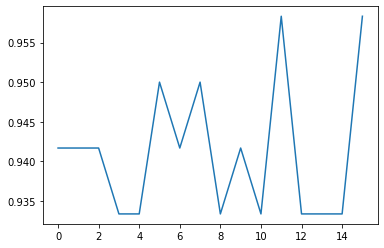

In [21]:
plt.plot(cv_performance)

In [23]:
print("Mean of the model performances:", np.asarray(cv_performance).mean())

0.9411458333333333

In [27]:
best_k = np.where(np.asarray(cv_performance) == max(np.asarray(cv_performance)))
best_k_parameter = best_k[0][0]

In [33]:
knn_best_model = KNeighborsClassifier(n_neighbors = best_k_parameter)
knn_best_model.fit(X_test_scaled3, y_test3)
knn_best_model_score = knn_best_model.score(X_test_scaled3, y_test3)

In [34]:
knn_best_model_score

0.8666666666666667